#Estimating the dynamics of SPARQL query results over Wikidata
##Alberto Moya and Aidan Hogan

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/server"

cmp.csv  count.csv  diffNorm.csv      dyn  Predicates.csv
code	 dic	    difNormCount.csv  old  Qfeatures.csv


In [0]:
import csv
import sys

datafile = open('/content/drive/My Drive/server/cmp.csv', 'r')
diffile = open('/content/drive/My Drive/server/diffNorm.csv', 'r')
predicates = open('/content/drive/My Drive/server/Predicates.csv', 'r')
features = open('/content/drive/My Drive/server/Qfeatures.csv', 'r')

datareader = csv.reader(datafile, delimiter=',')
difreader = csv.reader(diffile, delimiter=',')
preader = csv.reader(predicates, delimiter=',')
freader = csv.reader(features, delimiter=',')

data = []
for row in datareader:
    data.append(row)
    
dif = []
for drow in difreader:
    dif.append(drow)

pdata = []
for prow in preader:
    pdata.append(prow)

fdata = []
for frow in freader:
    fdata.append(frow)

dynrr = []
for file in ["dyn20170418-20170425.txt", "dyn20170425-20170503.txt", "dyn20170503-20170509.txt", "dyn20170509-20170516.txt", "dyn20170516-20170524.txt", "dyn20170524-20170530.txt", "dyn20170530-20170607.txt", "dyn20170607-20170613.txt", "dyn20170613-20170620.txt", "dyn20170620-20170627.txt", "dyn20170627-20170712.txt", "dyn20170712-20170718.txt", "dyn20170718-20170725.txt", "dyn20170725-20170802.txt", "dyn20170802-20170809.txt", "dyn20170809-20170816.txt", "dyn20170816-20170823.txt", "dyn20170823-20170830.txt", "dyn20170830-20170907.txt", "dyn20170907-20170913.txt", "dyn20170913-20170920.txt", "dyn20170920-20170927.txt"]:
    d = {}
    sum = 0
    with open('/content/drive/My Drive/server/dyn/' + file) as f:
        for line in f:
            (key, val) = line.split()
            d[key] = float(val)
    dynrr.append(d)
    
dicrr = []
for file in ["dyn20170418-20170425.txt", "dyn20170425-20170503.txt", "dyn20170503-20170509.txt", "dyn20170509-20170516.txt", "dyn20170516-20170524.txt", "dyn20170524-20170530.txt", "dyn20170530-20170607.txt", "dyn20170607-20170613.txt", "dyn20170613-20170620.txt", "dyn20170620-20170627.txt", "dyn20170627-20170712.txt", "dyn20170712-20170718.txt", "dyn20170718-20170725.txt", "dyn20170725-20170802.txt", "dyn20170802-20170809.txt", "dyn20170809-20170816.txt", "dyn20170816-20170823.txt", "dyn20170823-20170830.txt", "dyn20170830-20170907.txt", "dyn20170907-20170913.txt", "dyn20170913-20170920.txt", "dyn20170920-20170927.txt"]:
    d = {}
    sum = 0
    with open('/content/drive/My Drive/server/dic/' + file) as f:
        for line in f:
            (key, val) = line.split()
            d[key] = float(val)
    dicrr.append(d)

stdout = sys.stdout


In [0]:
def generate_osc_data(w=3):
    
    sys.stdout = open('class'+str(w)+'.csv', 'w')
  
    s = 'query_id'
    s  = s + ",triplesNum,varNum,ProjectVarsNum,predicateNum,HASFILTER,HASLIMIT,HASNEGATION,HASUNION,HASINFINITEPATH,HASSUBQUERIES,HASOPTIONAL,HASDISTINCT,HASBIND,HASHAVING,HASGROUPBY,HASORDERBY,HASOFFSET,HASVALUES"
    s  = s + ",dic_max,dic_min,dic_avg,dyn_max,dyn_min,dyn_avg"
    s  = s + ",past,changes"
    s  = s + ",dim_class"

    print(s)
    rows = len(data)
    columns = len(data[0])
    for i in range(1, columns - 2):#queries
        for j in range(w-1, rows-1):#weeks
            dic_max = 0
            dic_min = 1000000000 
            dic_avg = 0
            dyn_max = 0
            dyn_min = 25 
            dyn_avg = 0
            for p in range(len(pdata[i-1])):
                dic = 0
                dyn = 0
                for k in range(w-1):
                    dic += dicrr[j-k-1].get(pdata[i-1][p], 0)
                    dyn += float(dynrr[j-k-1].get(pdata[i-1][p], 0))
                dic /= (w-1)
                dyn /= (w-1)
                
                if dyn > dyn_max:
                    dyn_max = dyn
                if dyn < dyn_min:
                    dyn_min = dyn
                    
                if dic > dic_max:
                    dic_max = dic
                if dic < dic_min:
                    dic_min = dic
                    
                dic_avg += dic
                dyn_avg += dyn
            dyn_avg /= len(pdata[i-1])
            dic_avg /= len(pdata[i-1])
            s = ''
            #s = s + str(i)     #query_id
            for fi in range(len(fdata[0])):
                s = s + str(fdata[i-1][fi]) + ','     #qfeatures
            c = int(data[j+1][i])
            past = 0
            change = 0
            for k in range(w):
                past += int(data[j-k][i])
                change += float(dif[j-k][i])
            s = s + str(dic_max) + ',' + str(dic_min) + ',' + str(dic_avg) + ',' + str(dyn_max) + ',' + str(dyn_min) + ',' + str(dyn_avg) + ',' + str(past)  + ',' + str(change)  + ',' + str(c)
            print(s)

In [0]:
for w in [2,4,8,16]:
    generate_osc_data(w)
#    generate_ttl_data(w) 
    
sys.stdout = stdout

In [0]:
import pandas as pd
import io

#load csv
dfc2 = pd.read_csv('class2.csv', sep=',')
dfc4 = pd.read_csv('class4.csv', sep=',')
dfc8 = pd.read_csv('class8.csv', sep=',')
dfc16 = pd.read_csv('class16.csv', sep=',')

#load csv
#dft2 = pd.read_csv('ttl2.csv', sep=',')
#dft4 = pd.read_csv('ttl4.csv', sep=',')
#dft8 = pd.read_csv('ttl8.csv', sep=',')
#dft16 = pd.read_csv('ttl16.csv', sep=',')

#lista de atributos a analizar
features_to_plot = [e for e in list(dfc4) if e not in 
                    ['query_id','HASOFFSET']]

dfc4[features_to_plot].describe()



,triplesNum,varNum,ProjectVarsNum,predicateNum,HASFILTER,HASLIMIT,HASNEGATION,HASUNION,HASINFINITEPATH,HASSUBQUERIES,...,HASVALUES,dic_max,dic_min,dic_avg,dyn_max,dyn_min,dyn_avg,past,changes,dim_class
count,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,...,3978.000000,3.978000e+03,3.978000e+03,3.978000e+03,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000
mean,3.312217,3.049774,3.533937,3.882353,0.334842,0.171946,0.095023,0.067873,0.266968,0.090498,...,0.072398,2.799348e+06,6.122573e+04,8.438949e+05,0.038202,0.005043,0.017403,2.091252,0.354287,0.523127
std,1.960781,1.566893,1.657491,1.768394,0.471994,0.377381,0.293283,0.251560,0.442431,0.286930,...,0.259179,5.065836e+06,2.574082e+05,1.216820e+06,0.050684,0.009881,0.018871,1.613362,0.738192,0.499528
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.666667e+00,0.000000e+00,6.666667e+00,0.000093,0.000000,0.000093,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.088600e+05,1.700000e+01,2.818586e+05,0.014349,0.001758,0.008312,0.000000,0.000000,0.000000
50%,3.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.621422e+06,1.459833e+03,5.393012e+05,0.027899,0.003893,0.013108,2.000000,0.035714,1.000000
75%,4.000000,4.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.263707e+06,9.143333e+03,8.956556e+05,0.040690,0.006357,0.019574,4.000000,0.273295,1.000000
max,13.000000,12.000000,16.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.542823e+07,6.097546e+06,1.889136e+07,0.573612,0.296215,0.304113,4.000000,4.000000,1.000000


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


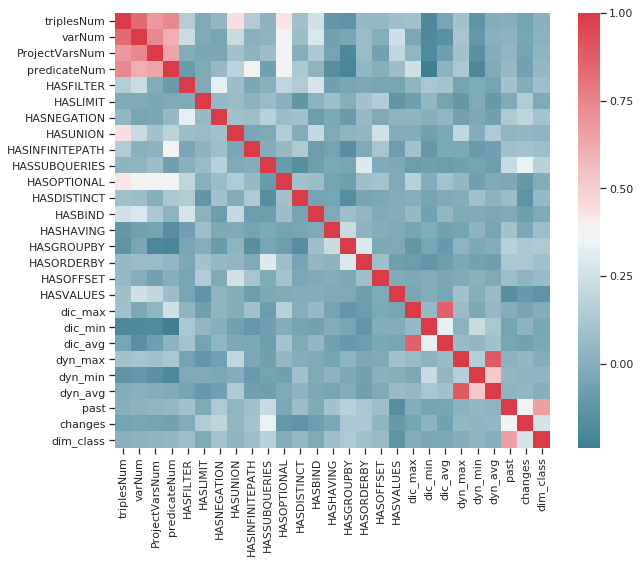

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn import preprocessing

XXX = dfc4
min_max_scaler = preprocessing.MinMaxScaler()
XXX[features_to_plot] = min_max_scaler.fit_transform(XXX[features_to_plot])

corr = XXX.corr()

f, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax) 

In [0]:
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report


def run_classifier(clf, X, y, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)
        clf.fit(X_train, y_train)    ## Entrenamos con X_train y clases y_train
        predictions = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test) 
        
        metrics['f1-score'].append(f1_score(y_test, predictions, average='micro'))  # X_test y y_test deben ser definidos previamente
        metrics['recall'].append(recall_score(y_test, predictions, average='micro'))
        metrics['precision'].append(precision_score(y_test, predictions, average='micro'))
    
    return metrics
  
def run_cross_validation(clf, X, y, cv=5):
  predictions = cross_val_predict(clf, X, y, cv=cv)

  #print("Metrics:")
  ##print(classification_report(y, predictions))
  #print("f1_score:", f1_score(y, predictions, average='micro'))  # X_test y y_test deben ser definidos previamente
  #print("recall_score:", recall_score(y, predictions, average='micro'))
  #print("precision_score:", precision_score(y, predictions, average='micro'))
  #print("Accuracy:", accuracy_score(y, predictions))
  f1=f1_score(y, predictions, average='macro')
  recall=recall_score(y, predictions, average='macro')
  precision=precision_score(y, predictions, average='macro')
  return f1,precision,recall
  
  
def run_linear_regression(clf, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
  
  regr.fit(X_train, y_train)

  y_pred = regr.predict(X_test)

  print('Coefficients: \n', regr.coef_)
  print("Mean squared error: %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
  print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC  # support vector machine classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import numpy as np

def run_classification(X, y):
  
  min_max_scaler = preprocessing.MinMaxScaler()
  X = min_max_scaler.fit_transform(X)
  
  c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
  c1 = ("Decision Tree", DecisionTreeClassifier())
  c2 = ("Gaussian Naive Bayes", GaussianNB())
  c3 = ("KNN", KNeighborsClassifier(n_neighbors=25))
  c4 = ("SVM-LinearSVC", LinearSVC(random_state=0, tol=1e-5))

  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
       intercept_scaling=1, loss='squared_hinge', max_iter=1000,
       multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)


  classifiers = [c0, c1, c2, c3, c4]#LogisticRegression(),GradientBoostingClassifier(n_estimators=1000),RandomForestClassifier(n_estimators=1000)

  arr = []
  for name, clf in classifiers:
  #    print("----------------")

  #    print("\nRandom partitions:")
  #    metrics = run_classifier(clf, X, y)
  #    print("Precision promedio:",np.array(metrics['precision']).mean())
  #    print("Recall promedio:",np.array(metrics['recall']).mean())
  #    print("F1-score promedio:",np.array(metrics['f1-score']).mean())

  #    print("\nCross-validation:")
      f,p,r = run_cross_validation(clf, X, y)
      arr.append([f,p,r])
  return arr


In [0]:

Q = ['triplesNum','varNum','ProjectVarsNum','predicateNum','HASFILTER','HASLIMIT','HASNEGATION','HASUNION','HASINFINITEPATH','HASSUBQUERIES','HASOPTIONAL','HASDISTINCT','HASBIND','HASHAVING','HASGROUPBY','HASORDERBY','HASOFFSET','HASVALUES']
P = ['dic_avg','dyn_avg']
R = ['past','changes']

results = []
for window in [dfc2,dfc4,dfc8,dfc16]:
  sets = []
  y = window['dim_class']
  for set in [Q,P,R,Q+P,Q+R,P+R,Q+P+R]:
    X = window[set].values
    res = run_classification(X, y)
    sets.append(res)
  results.append(sets)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
for m in range(3):#metric
  print("-----------Metric--------------")
  for p in range(4):#ventana
    print("Resultados para ventana de size",2**(p+1))
    for q in range(5): #clasifier   
      for r in range(7): #sets
        print(round(results[p][r][q][m],3),"\t",end="")
      print()
    print("-------------------------------")

#hasta aqui clasification

In [0]:
def generate_ttl_data(w=3):
  
    sys.stdout = open('ttl'+str(w)+'.csv', 'w')
    
    s = 'query_id'
    s  = s + ",triplesNum,varNum,ProjectVarsNum,predicateNum,HASFILTER,HASLIMIT,HASNEGATION,HASUNION,HASINFINITEPATH,HASSUBQUERIES,HASOPTIONAL,HASDISTINCT,HASBIND,HASHAVING,HASGROUPBY,HASORDERBY,HASOFFSET,HASVALUES"
    s  = s + ",dic_max,dic_min,dic_avg,dyn_max,dyn_min,dyn_avg"
    s  = s + ",past,changes"
    s  = s + ",ttl"

    print(s)
    w = 3
    rows = len(data)
    columns = len(data[0])
    for i in range(1, columns - 2):
        l = -1
        for j in range(w-1, rows-1):
            if data[j][i]=='1':
                if l > -1:
                    dic_max = 0
                    dic_min = 1000000000 
                    dic_avg = 0
                    dyn_max = 0
                    dyn_min = 25 
                    dyn_avg = 0
                    for p in range(len(pdata[i-1])):
                        dic = 0
                        dyn = 0
                        for k in range(w-1):
                            dic += dicrr[j-k-1].get(pdata[i-1][p], 0)
                            dyn += float(dynrr[j-k-1].get(pdata[i-1][p], 0))
                        dic /= (w-1)
                        dyn /= (w-1)

                        if dyn > dyn_max:
                            dyn_max = dyn
                        if dyn < dyn_min:
                            dyn_min = dyn

                        if dic > dic_max:
                            dic_max = dic
                        if dic < dic_min:
                            dic_min = dic

                        dic_avg += dic
                        dyn_avg += dyn
                    dyn_avg /= len(pdata[i-1])
                    dic_avg /= len(pdata[i-1])
                    s = ''
                    #s = s + str(i)     #query_id
                    for fi in range(len(fdata[0])):
                        s = s + str(fdata[i-1][fi]) + ','
                    past = 0
                    for k in range(w):
                        past += int(data[j-k][i])
                    s = s + str(dic_max) + ',' + str(dic_min) + ',' + str(dic_avg) + ',' + str(dyn_max) + ',' + str(dyn_min) + ',' + str(dyn_avg) + ',' + str(past)  + ',' + str(dif[j+1][i])  + ',' + str(j-l)
                    print(s)
                l = j
    #    break

In [0]:
for w in [2,4,8,16]:
#    generate_osc_data(w)
    generate_ttl_data(w) 
    
sys.stdout = stdout

In [0]:
import pandas as pd
import io

#load csv
#dfc2 = pd.read_csv('class2.csv', sep=',')
#dfc4 = pd.read_csv('class4.csv', sep=',')
#dfc8 = pd.read_csv('class8.csv', sep=',')
#dfc16 = pd.read_csv('class16.csv', sep=',')

#load csv
dft2 = pd.read_csv('ttl2.csv', sep=',')
dft4 = pd.read_csv('ttl4.csv', sep=',')
dft8 = pd.read_csv('ttl8.csv', sep=',')
dft16 = pd.read_csv('ttl16.csv', sep=',')

#lista de atributos a analizar
#features_to_plot = [e for e in list(dfc4) if e not in 
#                    ['query_id','HASOFFSET']]
#
#dfc4[features_to_plot].describe()

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Q = ['triplesNum','varNum','ProjectVarsNum','predicateNum','HASFILTER','HASLIMIT','HASNEGATION','HASUNION','HASINFINITEPATH','HASSUBQUERIES','HASOPTIONAL','HASDISTINCT','HASBIND','HASHAVING','HASGROUPBY','HASORDERBY','HASOFFSET','HASVALUES']
P = ['dic_avg','dyn_avg']
R = ['past']

for window in [dft2,dft4,dft8,dft16]:
  y = window['ttl']
  for set in [Q,P,R,Q+P,Q+R,P+R,Q+P+R]:
    X = window[set].values
    # Create linear regression object
    regr = linear_model.LinearRegression()
    run_linear_regression(regr, X, y)
    print("*************************")

ValueError: ignored

In [0]:


run_linear_regression(regr, X, y)

In [0]:
import csv
import sys

datafileNow = open('/content/drive/My Drive/server/difNormCount.csv', 'r')
#sys.stdout = open('contnorm.csv', 'w')

datareaderNow = csv.reader(datafileNow, delimiter=',')

for row in datareaderNow:
    for col in range(len(row)-1):
        (key, val) = row[col].split()
        if int(key) == 0:
            print(0,",",end="")
        else:
            print(float(key)/int(val),",",end="")
    print()

1.0 ,0 ,0 ,0.043478260869565216 ,0.0033259423503325942 ,0 ,0.47058823529411764 ,0.02711323763955343 ,0.5294117647058824 ,0 ,0.24561403508771928 ,0 ,0 ,0 ,0.2696335078534031 ,0 ,0 ,0 ,0.009868421052631578 ,0.008733624454148471 ,0.17582417582417584 ,0 ,0.02295003585943103 ,0.0016778523489932886 ,0 ,0.12195121951219512 ,0.009404388714733543 ,0 ,0 ,0 ,0 ,0.006434316353887399 ,0.0005878894767783657 ,0 ,0.2931297709923664 ,0.019805303793219202 ,0.06165228113440197 ,0 ,0.04242424242424243 ,0 ,0 ,0.03584581389639087 ,0.04 ,0 ,0 ,0.0392156862745098 ,0 ,0.0008067769261799112 ,0 ,0.0026484804343507914 ,0.04852160727824109 ,0 ,0.06666666666666667 ,0.047619047619047616 ,0.9629629629629629 ,0 ,0.009900990099009901 ,0.2465753424657534 ,0 ,0.019801980198019802 ,0.1 ,0.05555555555555555 ,0 ,0.08333333333333333 ,0 ,0 ,0 ,0.3050847457627119 ,0 ,0 ,0 ,0.46153846153846156 ,0 ,0 ,0.5842696629213483 ,0.5 ,0.14814814814814814 ,0 ,0 ,0.02127659574468085 ,0.0008227743952608195 ,0.008403361344537815 ,0.002006688

In [0]:
conteo = 20
dyndicc = {}
for file in ["dyn20170418-20170425.txt", "dyn20170425-20170503.txt", "dyn20170503-20170509.txt", "dyn20170509-20170516.txt", "dyn20170516-20170524.txt", "dyn20170524-20170530.txt", "dyn20170530-20170607.txt", "dyn20170607-20170613.txt", "dyn20170613-20170620.txt", "dyn20170620-20170627.txt", "dyn20170627-20170712.txt", "dyn20170712-20170718.txt", "dyn20170718-20170725.txt", "dyn20170725-20170802.txt", "dyn20170802-20170809.txt", "dyn20170809-20170816.txt", "dyn20170816-20170823.txt", "dyn20170823-20170830.txt", "dyn20170830-20170907.txt", "dyn20170907-20170913.txt", "dyn20170913-20170920.txt", "dyn20170920-20170927.txt"]:
  with open('/content/drive/My Drive/server/dyn/' + file) as f:
    for line in f:
      (key, val) = line.split()
      sum = dyndicc.get(key,0)
      dyndicc[key] = float(val) + sum
    
dicdicc = {}
for file in ["dyn20170418-20170425.txt", "dyn20170425-20170503.txt", "dyn20170503-20170509.txt", "dyn20170509-20170516.txt", "dyn20170516-20170524.txt", "dyn20170524-20170530.txt", "dyn20170530-20170607.txt", "dyn20170607-20170613.txt", "dyn20170613-20170620.txt", "dyn20170620-20170627.txt", "dyn20170627-20170712.txt", "dyn20170712-20170718.txt", "dyn20170718-20170725.txt", "dyn20170725-20170802.txt", "dyn20170802-20170809.txt", "dyn20170809-20170816.txt", "dyn20170816-20170823.txt", "dyn20170823-20170830.txt", "dyn20170830-20170907.txt", "dyn20170907-20170913.txt", "dyn20170913-20170920.txt", "dyn20170920-20170927.txt"]:
  with open('/content/drive/My Drive/server/dic/' + file) as f:
    for line in f:
      (key, val) = line.split()
      sum = dicdicc.get(key,0)
      dicdicc[key] = int(val) + sum

In [0]:
conteo = 40

for w in sorted(dyndicc, key=dyndicc.get, reverse=True):
  all = True
  for k in range(len(dynrr)):
    if dicrr[k].get(w, 0) == 0:
      all = False
      break
  if dicdicc[w] > 1000 and all:
    print(w, dicdicc[w], dyndicc[w]/22)
    conteo -= 1
    if conteo < 1:
      break

print("************************")
    
conteo = 10
for w in sorted(dicdicc, key=dicdicc.get, reverse=True):
  print(w, dicdicc[w], dyndicc[w]/22)
  conteo -= 1
  if conteo < 1:
    break

<http://www.w3.org/2002/07/owl#complementOf> 156862 0.9976686586278606
<http://www.w3.org/2002/07/owl#onProperty> 156862 0.9976686586278606
<http://www.w3.org/2002/07/owl#someValuesFrom> 86674 0.7095699980214293
<http://www.wikidata.org/prop/direct/P2462> 3563 0.6231572404118282
<http://www.wikidata.org/prop/direct/P3383> 4388 0.5802925292276103
<http://www.wikidata.org/prop/direct/P2331> 4229 0.32954126773410525
<http://www.wikidata.org/prop/direct/P1112> 4366 0.19811047219078456
<http://www.wikidata.org/prop/direct/P505> 4959 0.180957247734058
<http://schema.org/dateModified> 99330382 0.13701184988667817
<http://schema.org/version> 99330164 0.13701158916962394
<http://www.wikidata.org/prop/direct/P3868> 1899 0.13023724996921185
<http://www.wikidata.org/prop/direct/P3497> 1428 0.10688780051298381
<http://www.wikidata.org/prop/direct/P2186> 74468 0.1038806429676573
<http://www.wikidata.org/prop/direct/P496> 27577 0.10310819685523902
<http://www.wikidata.org/prop/direct/P304> 6540543 0.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


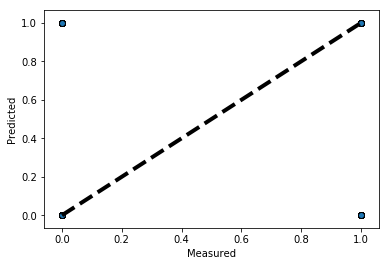

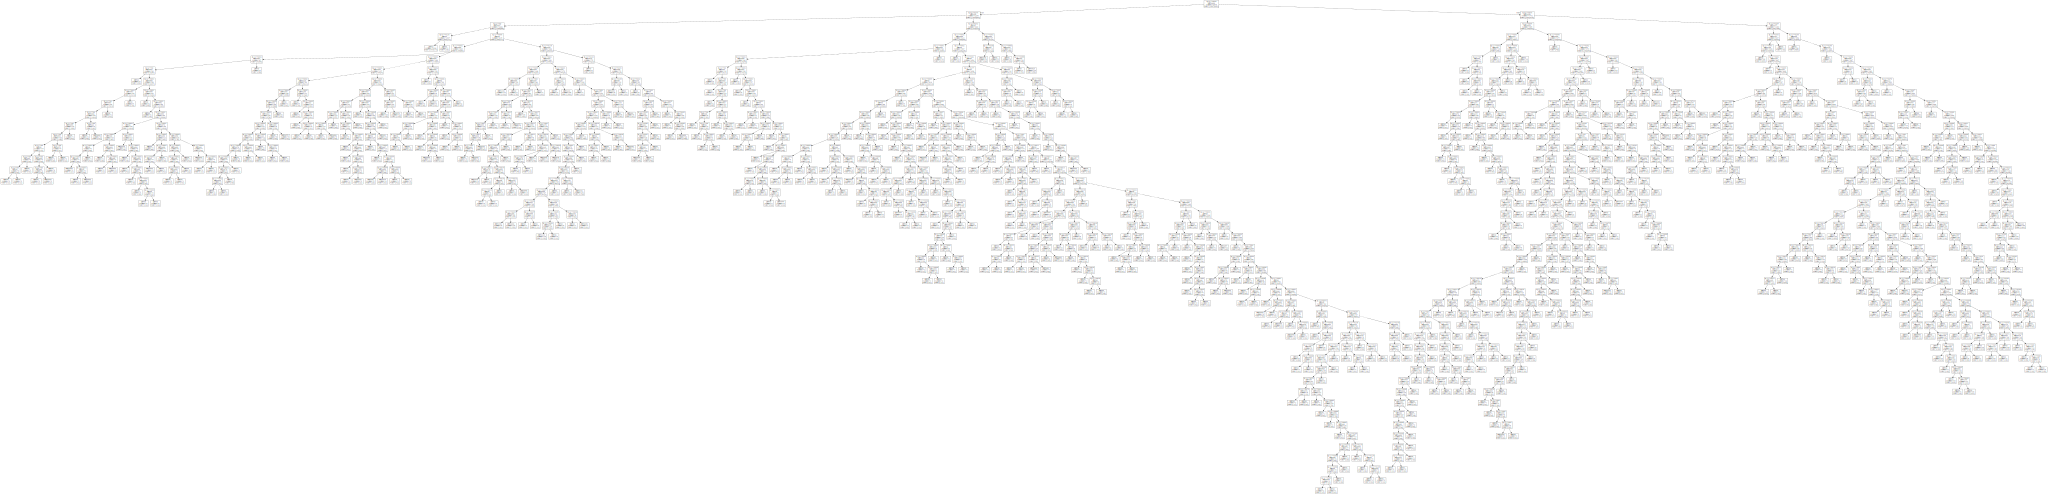

In [0]:
#test tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

R = ['past','changes']
y = dfc4['dim_class']
X = dfc4[R].values
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
c1f = DecisionTreeClassifier()
predictions = cross_val_predict(c1f, X, y)
f1=f1_score(y, predictions, average='macro')
recall=recall_score(y, predictions, average='macro')
precision=precision_score(y, predictions, average='macro')

fig, ax = plt.subplots()
ax.scatter(y, predictions, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
X
clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph


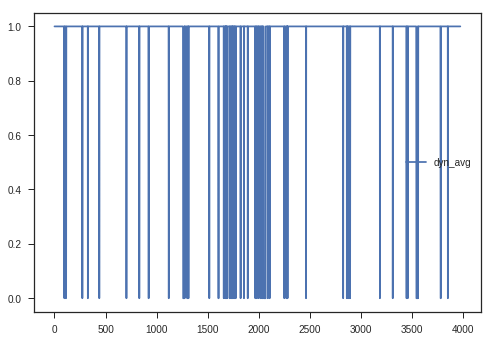

In [0]:
dfc4.plot(y='dyn_avg')


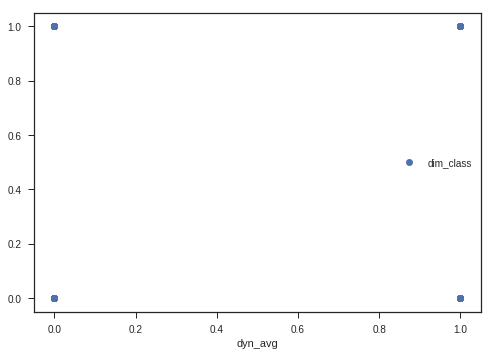

In [0]:
dfc4.plot(x='dyn_avg', y='dim_class', style='o')

In [0]:
#lista de atributos a analizar
features_to_plot = [e for e in list(dft4) if e not in 
                    ['query_id','HASOFFSET']]

dft4[features_to_plot].describe()



,triplesNum,varNum,ProjectVarsNum,predicateNum,HASFILTER,HASLIMIT,HASNEGATION,HASUNION,HASINFINITEPATH,HASSUBQUERIES,...,HASBIND,HASHAVING,HASGROUPBY,HASORDERBY,HASVALUES,dim_max,dim_min,dim_avg,past,ttl
count,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,...,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2.114000e+03,2114.000000,2.114000e+03,2114.000000,2114.000000
mean,3.316935,3.080416,3.580889,3.948439,0.376537,0.165090,0.128666,0.077105,0.299905,0.143330,...,0.062441,0.017029,0.208609,0.438505,0.037843,2.670256e+06,18.509934,7.565405e+05,2.622990,1.430464
std,1.965829,1.606354,1.823581,1.888689,0.484632,0.371349,0.334909,0.266821,0.458325,0.350492,...,0.242012,0.129411,0.406411,0.496321,0.190861,5.696533e+06,8.320949,1.162606e+06,0.644068,1.342148
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+00,0.000000,3.500000e+00,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.055105e+05,20.000000,2.266508e+05,2.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.072776e+06,23.000000,4.073152e+05,3.000000,1.000000
75%,4.000000,3.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,2.134327e+06,23.000000,8.222298e+05,3.000000,1.000000
max,13.000000,12.000000,16.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.784486e+07,23.000000,1.362931e+07,3.000000,18.000000


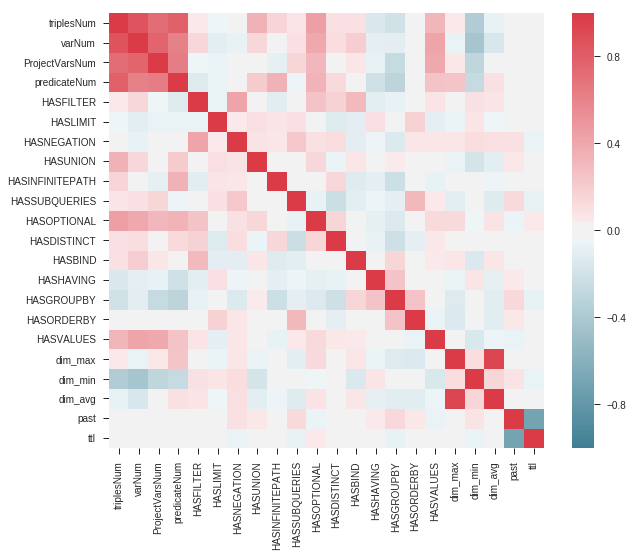

In [0]:
corr = dft4[features_to_plot].corr()

f, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax) 